# Домашнее задание 4.

## Задание 1
### 1.1. Скачать данные
Описание датасета


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc-house-data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

In [3]:
df['price'].value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

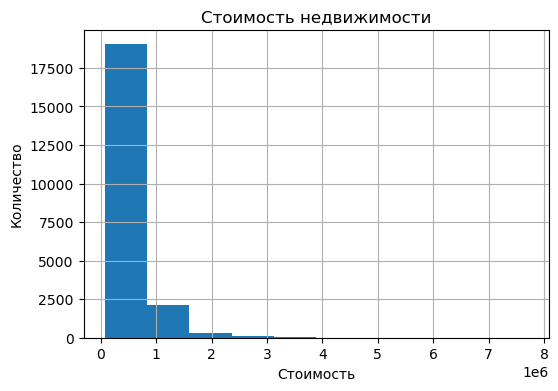

In [4]:
plt.figure(figsize=(6, 4))

plt.hist(df['price'], bins = 10)

plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.grid();

### 1.3 Изучите распределение квадратуры жилой площади

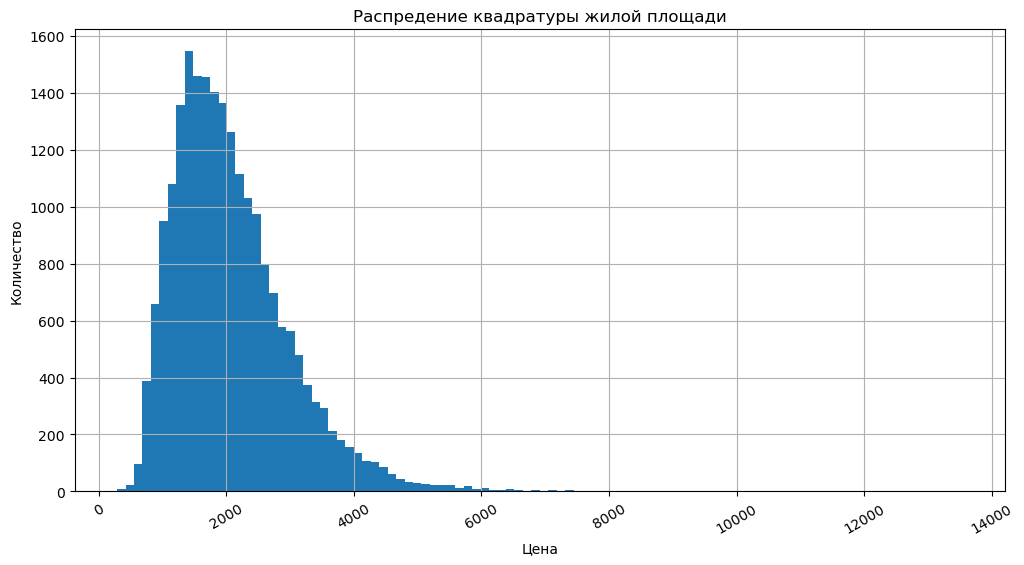

In [5]:
plt.figure(figsize=(12, 6))

plt.hist(df['sqft_living'], bins = 100)

plt.title('Распредение квадратуры жилой площади')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.xticks(rotation=30)
plt.grid();

### 1.4 Изучите распределение года постройки
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы


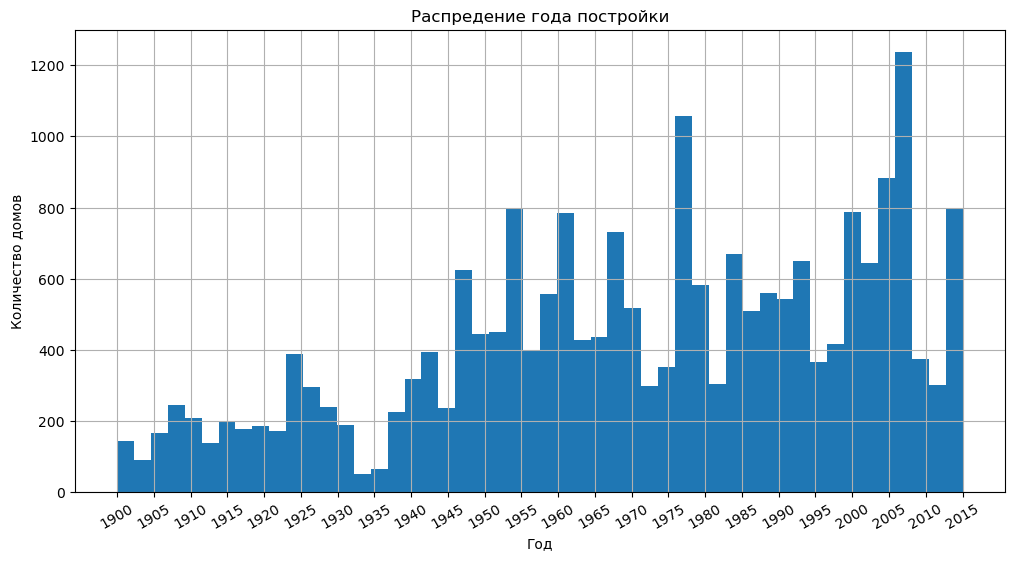

In [6]:
plt.figure(figsize=(12, 6))

plt.hist(df['yr_built'], bins = 50)

plt.title('Распредение года постройки')
plt.xlabel('Год')
plt.ylabel('Количество домов')
plt.xticks(range(1900, 2020, 5))
plt.xticks(rotation=30)
plt.grid();

Максимальное количество домов построено в 1976-1980 гг. и с 2005 г. по 2008г.
Минимальное количество домов построено в 1930-1937 гг.
В целом, с 1900г. по 1940г. строили намного меньше домов, чем в послевоенное время, начиная с 1946г.

## Задание 2.
### 2.1 Изучите распределение домов от наличия вида на набережную


In [7]:
data = df['waterfront'].value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

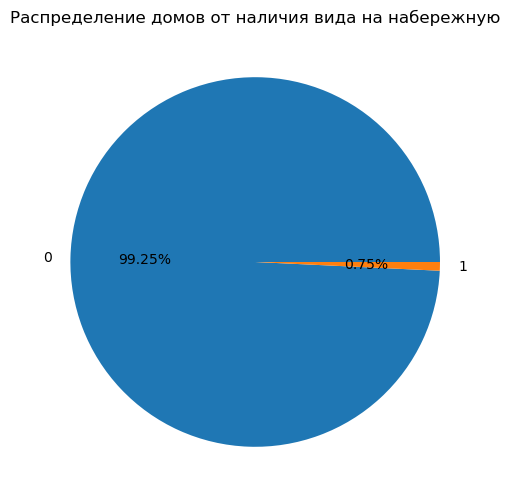

In [8]:
plt.figure(figsize=(12, 6))

plt.pie(data, labels=data.index, autopct='%1.2f%%')
plt.title('Распределение домов от наличия вида на набережную');

Менее 1% домов продаются с видом на набережную.

### 2.2 Изучите распределение этажей домов

In [9]:
data=df['floors'].value_counts()
data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

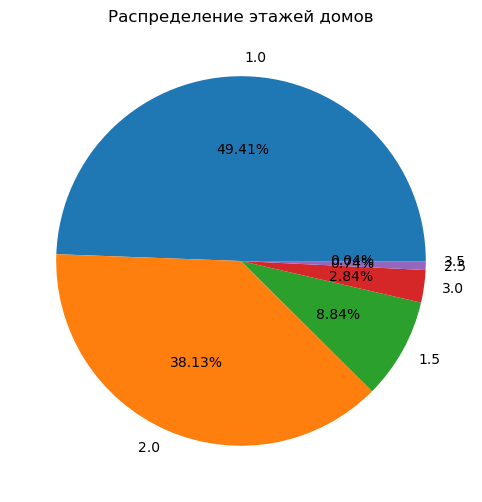

In [10]:
plt.figure(figsize=(12, 6))

plt.pie(data, labels=data.index, autopct='%1.2f%%')
plt.title('Распределение этажей домов');

В продаже имеется подавляющее большинство одно- и двухэтажных домов, меньше всего домов с этажностью 2,5 и 3,5.

### 2.3 Изучите распределение состояния домов
- Постройте график
- Сделайте выводы

In [11]:
data=df['condition'].value_counts()
data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

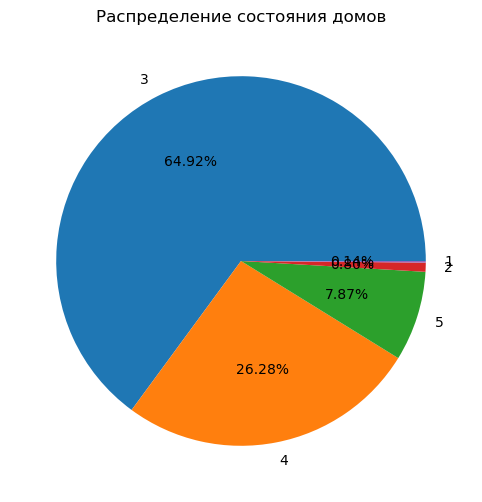

In [12]:
plt.figure(figsize=(12, 6))

plt.pie(data, labels=data.index, autopct='%1.2f%%')
plt.title('Распределение состояния домов');

Менее 1% домов находятся в плохом состоянии, почти 65% домов имеют среднее состояние, а 34% в хорошем и отличном состоянии.

## Задание 3.
### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


Шкала Чеддока(для коэф. Пирсона):
- 0.1 - 0.3 - Слабая
- 0.3 - 0.5 - Умеренная
- 0.5 - 0.7 - Заметная
- 0.7 - 0.9 - Высокая
- 0.9 - 0.99 - Весьма высокая

In [13]:
corr_m = df.corr().round(1)
corr_m[np.abs(corr_m) < 0.3] = 0
corr_m

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\1491334957.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_m = df.corr().round(1)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\659790192.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  upp_mat = np.triu(df.corr())


Text(0.5, 1.0, 'Характеристики, влияющие на стоимость недвижимости')

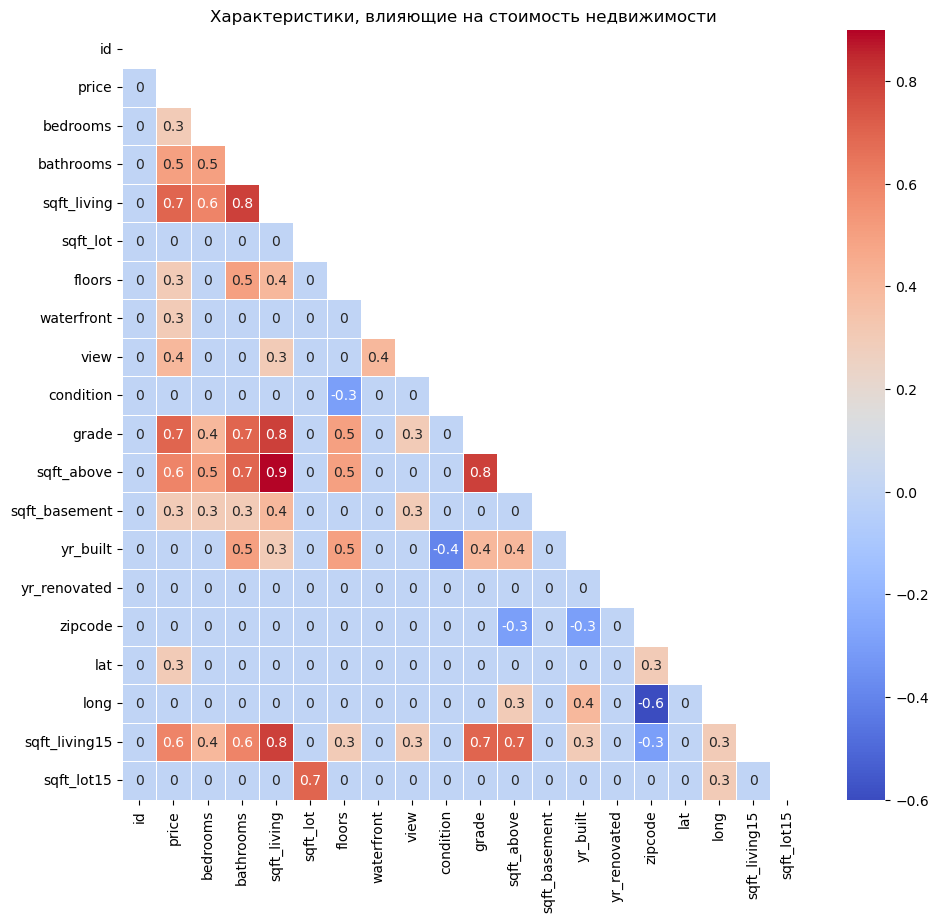

In [14]:
plt.figure(figsize=(11, 10))
upp_mat = np.triu(df.corr())
sns.heatmap(corr_m, annot=True, linewidths=.5, cmap='coolwarm', mask= upp_mat)

plt.title('Характеристики, влияющие на стоимость недвижимости')

Если посмотреть на колонку price в сравнении с другими показателями, то мы видим, что такие показатели, как grade (оценка дома), sqft_living (жилая площадь), sqft_living_15 (жилая площадь соседних домов), sqft_above (площадь участка), bathrooms (Кол-во ванных комнат) влияют на стоимость недвижимости в большей степени.
Посмотрим на других графиках, так ли это.

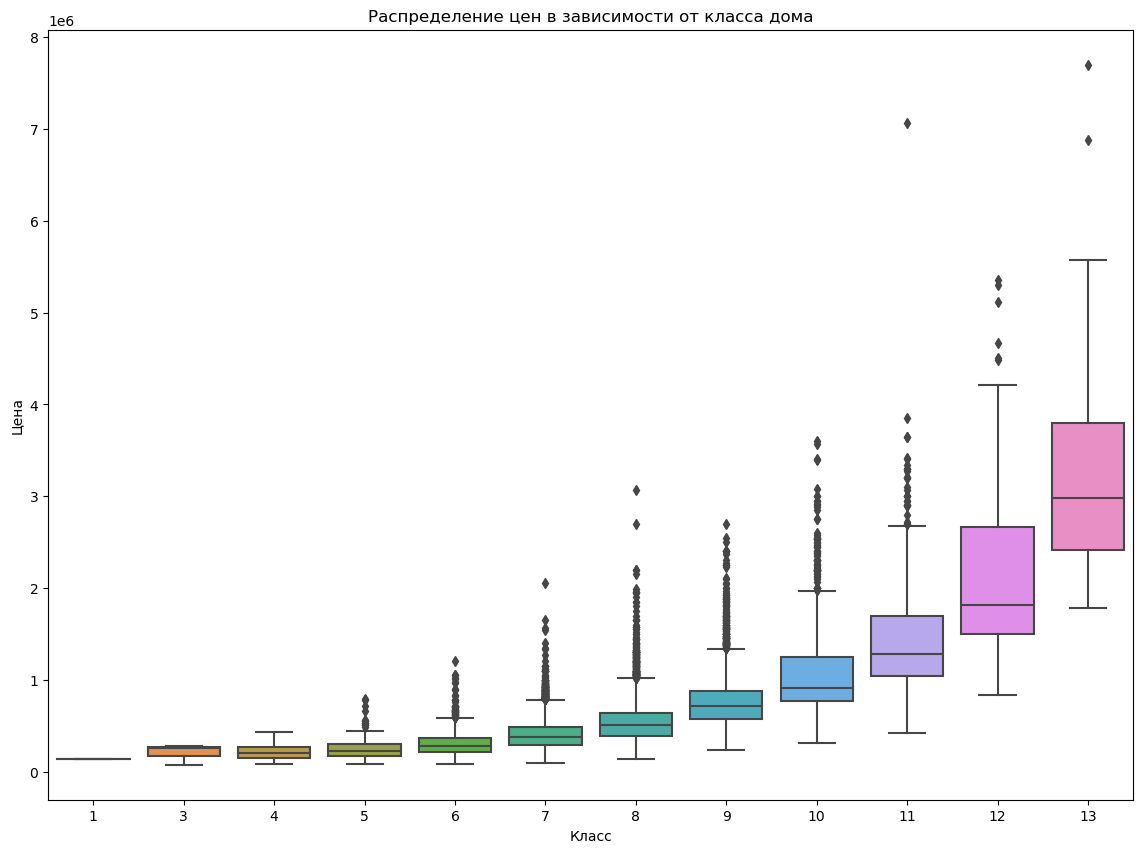

In [15]:
plt.figure(figsize=(14, 10))

sns.boxplot(x=df['grade'], y=df['price'])

plt.xlabel('Класс')
plt.ylabel('Цена')
plt.title('Распределение цен в зависимости от класса дома');

Чем выше состояние дома, тем выше его стоимость. Больше всего выбросов наблюдается для домов с оценкой 7-11.

In [16]:
data = df.groupby('yr_built')['price'].mean().reset_index()
data

,yr_built,price
0,1900,581387.206897
1,1901,556935.931034
2,1902,673007.407407
3,1903,480958.195652
4,1904,583756.644444
...,...,...
111,2011,544522.000000
112,2012,527447.335294
113,2013,678545.452736
114,2014,683681.754919


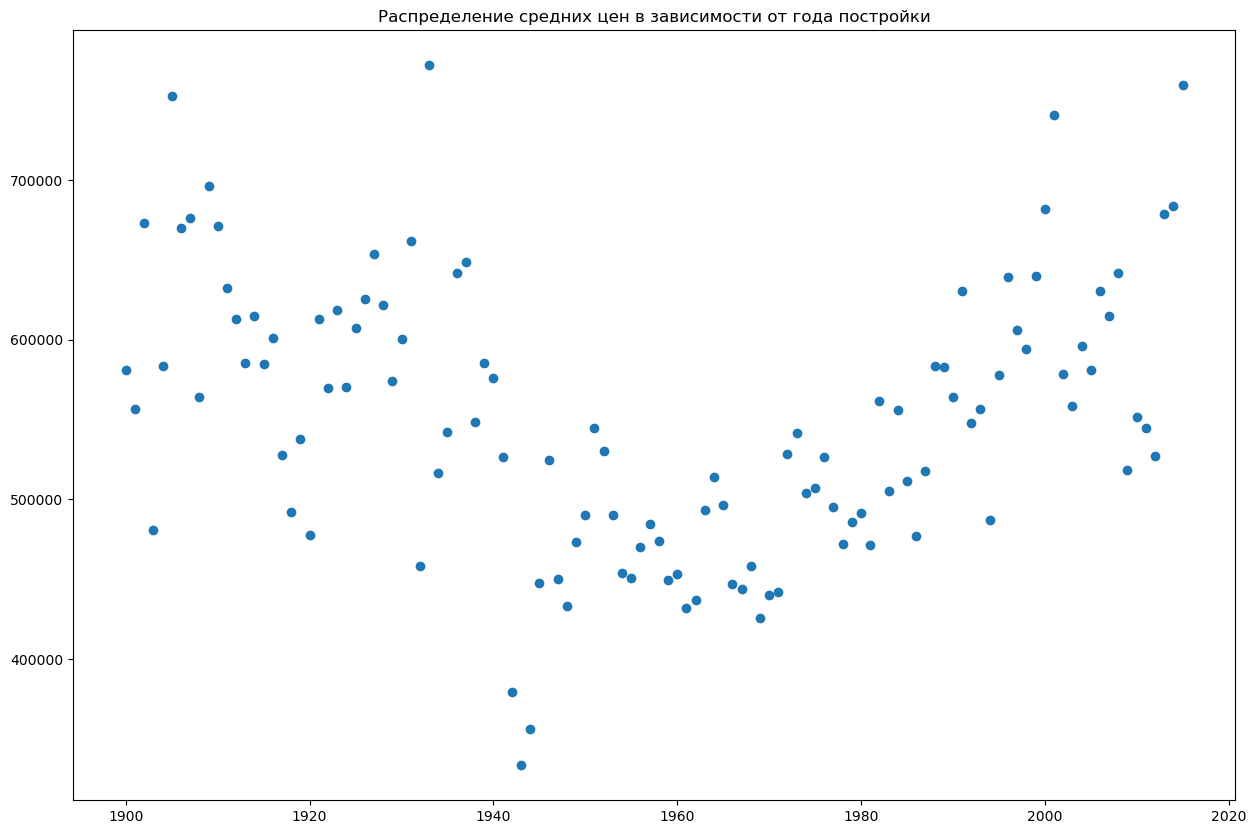

In [17]:
plt.figure(figsize=(15, 10))
plt.scatter(data['yr_built'], data['price'])
plt.title('Распределение средних цен в зависимости от года постройки');

Стоимость домов, построенных с 1900-х по 1960-х постепенно снижается, а далее постепенно возрастатет в соответствии с увеличением года постройки.
Минимальная стоимость у домов, построенных с 1940-ого по 1970г.
Дома, построенные в 1900-1920гг. дороже, скорее всего, изз-за своего исторического наследия на сегодняшний день, а дома 2020-ого года постройки имеют высокую стоимость из-за новизны.

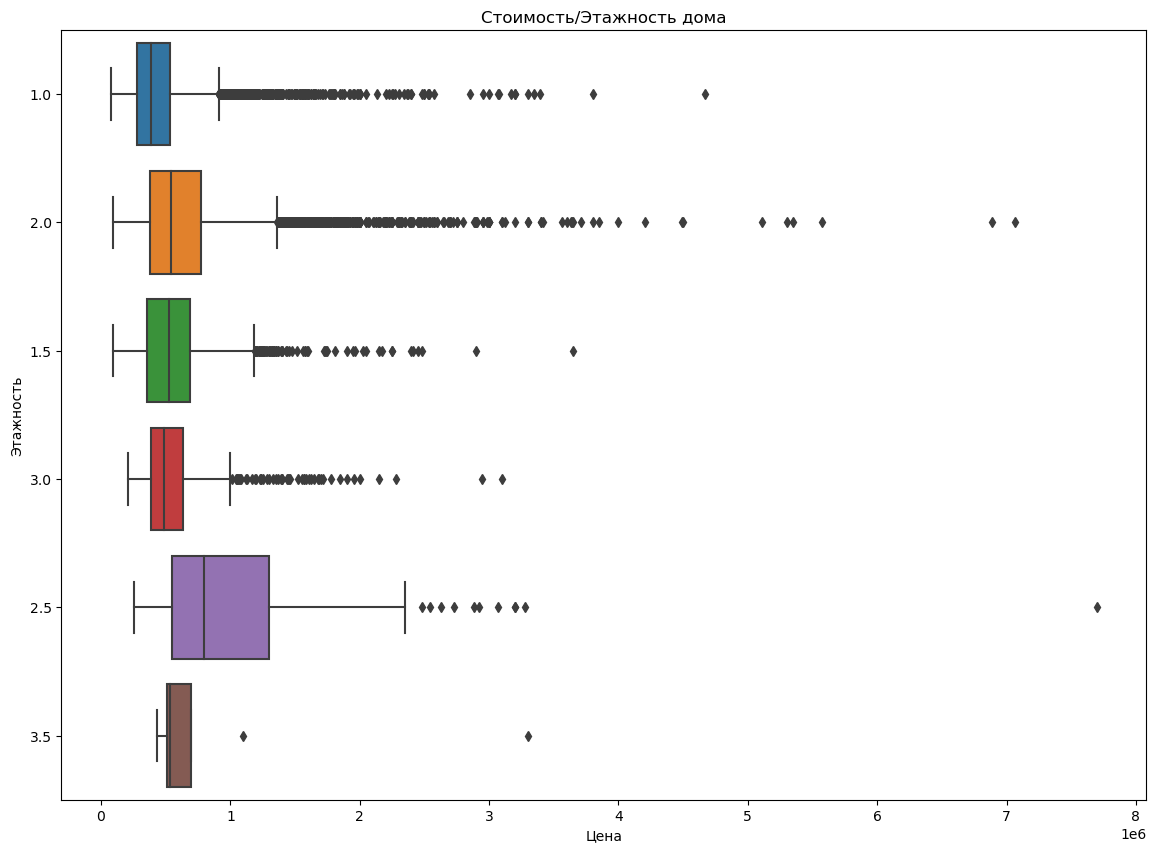

In [18]:
plt.figure(figsize = (14,10))
sns.boxplot(x = df['price'], y = df['floors'].astype('str'), whis = 1.5)
plt.xlabel('Цена')
plt.ylabel('Этажность')
plt.title('Стоимость/Этажность дома');

 У 2-этажных домов наибольшее количество выбросов, у домов с этажностью 2,5 наблюдается максимальный разброс цен.

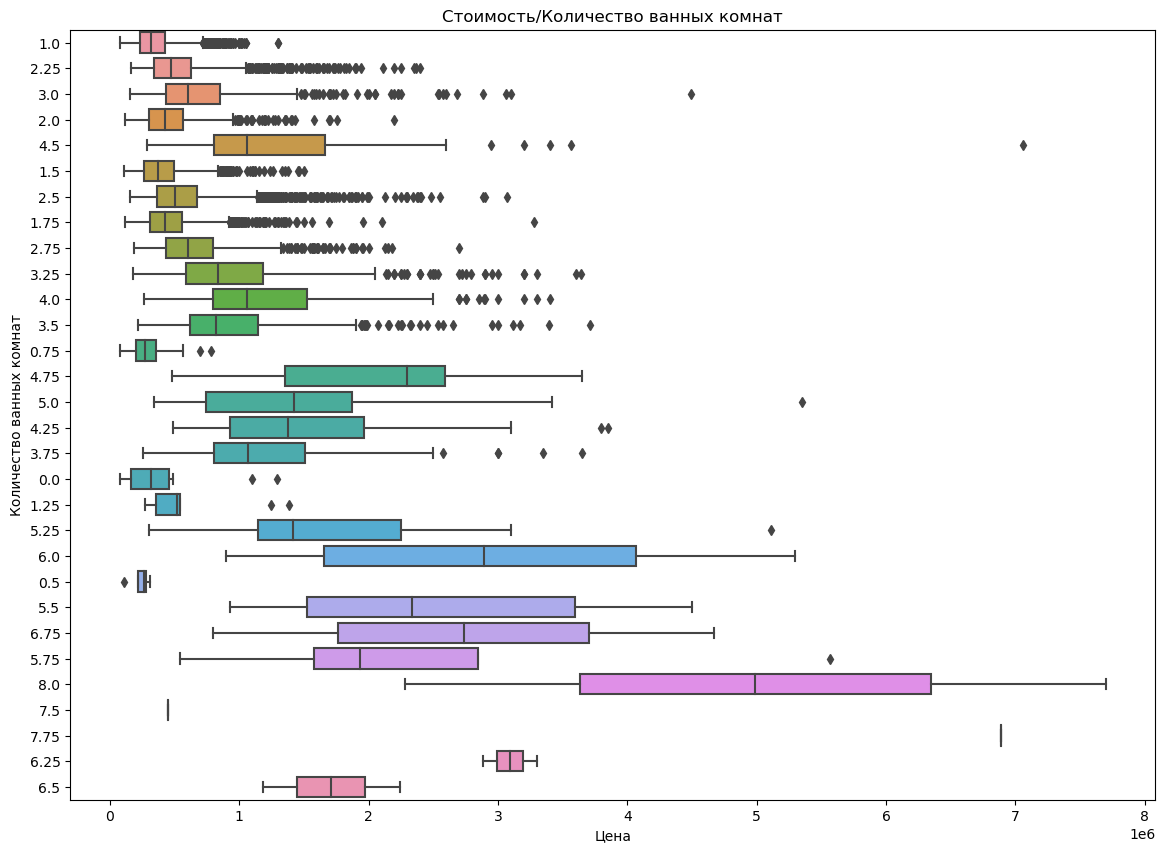

In [20]:
plt.figure(figsize = (14,10))
sns.boxplot(x = df['price'], y = df['bathrooms'].astype('str'), whis = 1.5)
plt.xlabel('Цена')
plt.ylabel('Количество ванных комнат')
plt.title('Стоимость/Количество ванных комнат');

Чем больше ванных комнат в доме, тем выше ее стоиомость.